In [728]:
# import libraries
import numpy as np
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import missingno to handle missing data
import missingno

# Set the seaborn plot theme
sns.set_theme(style="whitegrid")

In [678]:
# import the data (Source: https://data.openup.org.za/dataset/2016-matric-schools-report-ybxv-paxu)
# updated: October 8, 2021, 8:34 PM (UTC+02:00)
source = 'Dataset/2016 Matric Reports.csv'
df = pd.read_csv(source)

In [679]:
# take a quick look at the dataset
df.head()

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
0,200300003,4161001,AMABELE SENIOR SECONDARY SCHOOL,1.0,37.0,14.0,37.8,0.0,38.0,29.0,76.3,12,51,36,70.6
1,200300869,4161002,BETHEL COLLEGE HIGH SCHOOL,99.0,59.0,42.0,71.2,3.0,46.0,31.0,67.4,0,34,24,70.6
2,200300024,4161003,BLYTHSWOOD INSTITUTION,3.0,80.0,50.0,62.5,12.0,81.0,34.0,42.0,7,101,59,58.4
3,200300033,4161048,BONGOLETHU SENIOR SECONDARY SCHOOL,2.0,26.0,13.0,50.0,2.0,35.0,11.0,31.4,0,24,9,37.5
4,200300741,4161037,BUTTERWORTH HIGH SCHOOL,4.0,81.0,61.0,75.3,4.0,85.0,78.0,91.8,0,84,77,91.7


In [680]:
df.columns

Index(['emis', 'centre_no', 'name', 'quintile', 'wrote_2014', 'passed_2014',
       'perc_2014', 'progressed_2015', 'wrote_2015', 'passed_2015',
       'perc_2015', 'progressed_2016', 'wrote_2016', 'passed_2016',
       'perc_2016'],
      dtype='object')

# About the dataset

This dataset describes matric student performances by school from 2014 to 2016, separated by quintile, which is a school ranking system (**1 - 5**) used by the education department to classify a school in terms of school facilities (science lab, library, computer lab, pools etc), where it is based (rural, informal, CBD), teacher qualifications (BEd, Masters etc.) and other characteristics not mentioned.

- **Emis** - EMIS is a function and unit in the DBE with the responsibility to develop and maintain an integrated education information system for management of education.(https://www.education.gov.za/Programmes/EMIS.aspx)
- **Centre_no** - [numerical] centre number
- **name** - [categorical] school name
- **quintile** - [discrete][categorical] School standard (1 - 5 only)
- **wrote 2014 - 2016** - [discrete] number of individuals that wrote (from 2014 to 2016)
- **passed 2014 - 2016** - [discrete] numbre of individuals that passed (from 2014 to 2016)
- **perc_2014 - 2016** - [discrete] Percentage pass rate (from 2014 to 2016)
- **progessed** - no information on this column was given (and how it was calculated)

# Check for duplicate data

In [681]:
# retrieve the first 5 results for duplicated schools by name
df[df[['name']].duplicated()].head()

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
75,200601045,4141025,ZWELANDILE SENIOR SECONDARY SCHOOL,2.0,61.0,20.0,32.8,0.0,56.0,14.0,25.0,45,47,26,55.3
302,200200126,4191010,DONDASHE SENIOR SECONDARY SCHOOL,2.0,38.0,10.0,26.3,0.0,40.0,11.0,27.5,0,28,12,42.9
385,200600642,4081017,NTSOKOTHA SENIOR SECONDARY SCHOOL,2.0,164.0,136.0,82.9,17.0,253.0,153.0,60.5,22,181,103,56.9
387,200601029,4081019,PAKAMANI SENIOR SECONDARY SCHOOL,3.0,26.0,23.0,88.5,6.0,23.0,13.0,56.5,7,19,12,63.2
497,200401280,4011002,DINIZULU SENIOR SECONDARY SCHOOL,2.0,43.0,22.0,51.2,57.0,58.0,19.0,32.8,0,50,12,24.0


In [682]:
df[df['name']=='ZWELANDILE SENIOR SECONDARY SCHOOL']

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
48,200300702,4161035,ZWELANDILE SENIOR SECONDARY SCHOOL,3.0,56.0,30.0,53.6,0.0,82.0,42.0,51.2,0,97,38,39.2
75,200601045,4141025,ZWELANDILE SENIOR SECONDARY SCHOOL,2.0,61.0,20.0,32.8,0.0,56.0,14.0,25.0,45,47,26,55.3


In [683]:
# check duplicates by centre number. because centre numbre is specific for each school 
# even though they might have the same name
df[['name','centre_no']].duplicated().sum()

0

So it stands to reason that I cannot delete the duplicated rows as they seem to have the same name but different centre number.

Further investigations based on the centre numbers provided the following:

4161035 Zwelandile Senior SecondaN<br>
4141025 Zwelandile Senior SecondaN.

It seems that even though the centre number is different, the school is the same.

With this information, I have decided to drop the 17 duplicated rows in the 1000 row database

In [684]:
# dropping the duplicate rows
df.drop_duplicates(subset='name', inplace=True)

# Check appropriate data types

In [685]:
df.dtypes

emis                 int64
centre_no            int64
name                object
quintile           float64
wrote_2014         float64
passed_2014        float64
perc_2014          float64
progressed_2015    float64
wrote_2015         float64
passed_2015        float64
perc_2015          float64
progressed_2016      int64
wrote_2016           int64
passed_2016          int64
perc_2016          float64
dtype: object

Data types seem to be in their correct types

# Deal with NANs and irregular data

Quintile column has 99.0, which is inconsistent. Quintiles are from 1 to 5. Replace all 99.0 with NaN

In [686]:
# Replace 99.0 with NaN
df['quintile'] = df['quintile'].replace(99.0, np.nan)

In [687]:
df.head()

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
0,200300003,4161001,AMABELE SENIOR SECONDARY SCHOOL,1.0,37.0,14.0,37.8,0.0,38.0,29.0,76.3,12,51,36,70.6
1,200300869,4161002,BETHEL COLLEGE HIGH SCHOOL,NaN,59.0,42.0,71.2,3.0,46.0,31.0,67.4,0,34,24,70.6
2,200300024,4161003,BLYTHSWOOD INSTITUTION,3.0,80.0,50.0,62.5,12.0,81.0,34.0,42.0,7,101,59,58.4
3,200300033,4161048,BONGOLETHU SENIOR SECONDARY SCHOOL,2.0,26.0,13.0,50.0,2.0,35.0,11.0,31.4,0,24,9,37.5
4,200300741,4161037,BUTTERWORTH HIGH SCHOOL,4.0,81.0,61.0,75.3,4.0,85.0,78.0,91.8,0,84,77,91.7


# Check for missing data

Before droping any columns, I want to address the missing data first, because I can use the columns to understand how to deal with any missing data

<AxesSubplot:>

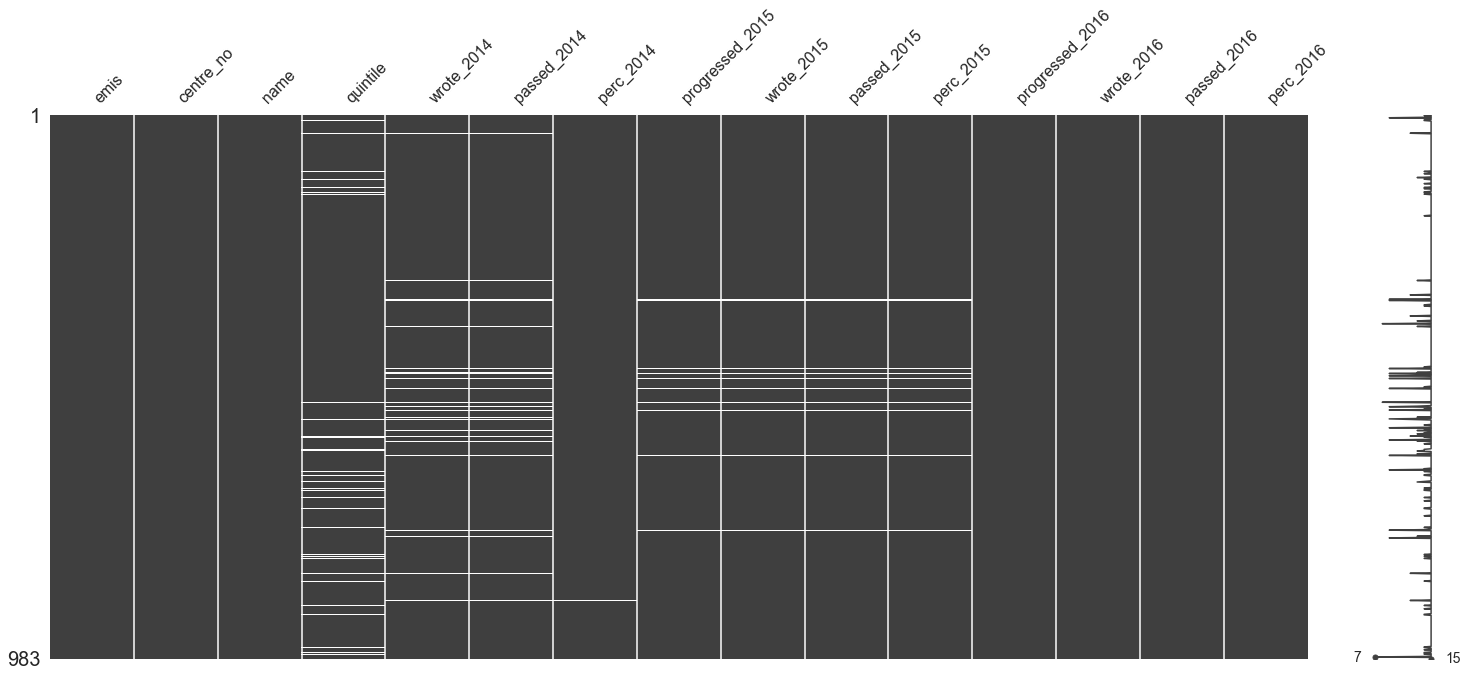

In [688]:
missingno.matrix(df)

In [689]:
# since i will be dropping certain columns that we wont need later, i will check missing data
# in only the columns i will use
miss_df = df[['name','quintile', 'wrote_2014', 'passed_2014',
       'perc_2014', 'progressed_2015', 'wrote_2015', 'passed_2015',
       'perc_2015', 'progressed_2016', 'wrote_2016', 'passed_2016',
       'perc_2016']]

# These are what Missing
missing_data = miss_df.isnull().sum()
missing_data

name                0
quintile           65
wrote_2014         41
passed_2014        41
perc_2014           2
progressed_2015    20
wrote_2015         20
passed_2015        20
perc_2015          20
progressed_2016     0
wrote_2016          0
passed_2016         0
perc_2016           0
dtype: int64

In [690]:
# get the number of cells in the dataframe
total_cells = np.product(miss_df.shape)

# sum the total of cells with missing data
total_missing = missing_data.sum()

# round the output by 2 decimal places
round((total_missing/total_cells)*100, 2)

1.79

With this small amount of missing data I can remove all the rows and be able to run analysis on the data available. These schools are are independant and since theres no regional category, all these schools are taken as a whole. So the data can then be assesed on what is available, droping 1.8% of the data, will not bias the data significantly.

In [691]:
# drop all NaN rows
df.dropna(inplace = True)

# Columns to drop

These columns can be dropped as they do not serve any statistical purpose, only for referencing the data:

emis, centre_no, progressed 2015 and 2016 - won't drop name now because it will be used to find out the top schools in SA

In [692]:
# function to delete columns
def column_drop(dframe, column):
    return dframe.drop(column, axis = 1, inplace = True)

# list of columns to drop
columns_to_drop = ['emis', 'centre_no', 'progressed_2015', 'progressed_2016']

# loop to iterate through the list of columns to drop in place
for item in columns_to_drop:
    column_drop(dframe = df, column = item)

In [693]:
df.head()

,name,quintile,wrote_2014,passed_2014,perc_2014,wrote_2015,passed_2015,perc_2015,wrote_2016,passed_2016,perc_2016
0,AMABELE SENIOR SECONDARY SCHOOL,1.0,37.0,14.0,37.8,38.0,29.0,76.3,51,36,70.6
2,BLYTHSWOOD INSTITUTION,3.0,80.0,50.0,62.5,81.0,34.0,42.0,101,59,58.4
3,BONGOLETHU SENIOR SECONDARY SCHOOL,2.0,26.0,13.0,50.0,35.0,11.0,31.4,24,9,37.5
4,BUTTERWORTH HIGH SCHOOL,4.0,81.0,61.0,75.3,85.0,78.0,91.8,84,77,91.7
6,CUNNINGHAM SENIOR SECONSARY SCHOOL,3.0,61.0,22.0,36.1,51.0,27.0,52.9,64,35,54.7


# Convert Quintile column to category type

In [694]:
# Make a copy of the dataframe to work with and manipulate
matrics = df.copy()

In [695]:
matrics['quintile_cat'] = matrics['quintile']

# the quintile numbers to replace
quintiles_num = [1.0, 2.0, 3.0, 4.0, 5.0]

# The values that will be placed
quintiles_cat = ['One', 'Two', 'Three', 'Four', 'Five']

# loop to iterate through each row and apply the changes
for item in range(len(quintiles_num)):
    matrics['quintile_cat'] = matrics['quintile_cat'].replace(quintiles_num[item], quintiles_cat[item])

In [696]:
matrics['quintile_cat'].unique()

array(['One', 'Three', 'Two', 'Four', 'Five'], dtype=object)

#### ========================================================
#    EDA (Exploratory Data Analysis)
#### ========================================================

Quintile 1 - 3 are usually schools that are free, while 4 and 5 and paid schools. ans the Main question here is, **does quintile of a school affect the pass rate? (the numbre of students passing)**

In [697]:
# get the summary of the dataset
round(matrics.describe(),2)

,quintile,wrote_2014,passed_2014,perc_2014,wrote_2015,passed_2015,perc_2015,wrote_2016,passed_2016,perc_2016
count,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00
mean,2.57,79.35,54.52,65.76,100.14,61.38,59.69,94.38,60.11,62.87
std,1.17,55.52,46.62,23.07,69.93,53.17,24.59,71.63,52.47,24.85
min,1.00,5.00,0.00,0.00,5.00,1.00,2.20,4.00,0.00,0.00
25%,2.00,40.00,21.00,49.70,50.00,23.00,39.40,43.00,21.00,43.65
50%,3.00,66.00,41.00,67.70,85.00,46.00,58.40,77.00,46.50,63.50
75%,3.00,103.75,74.00,85.00,132.00,84.00,80.00,126.00,81.00,85.25
max,5.00,416.00,343.00,100.00,648.00,428.00,100.00,707.00,378.00,100.00


In [698]:
# some lists
years_list = ['perc_2014','perc_2015','perc_2016']

# What's the average student perfomance per quintile over the years

In [699]:
# select the appropriate columns
stu_p = matrics[['quintile_cat','quintile','perc_2014', 'perc_2015', 'perc_2016']].copy()

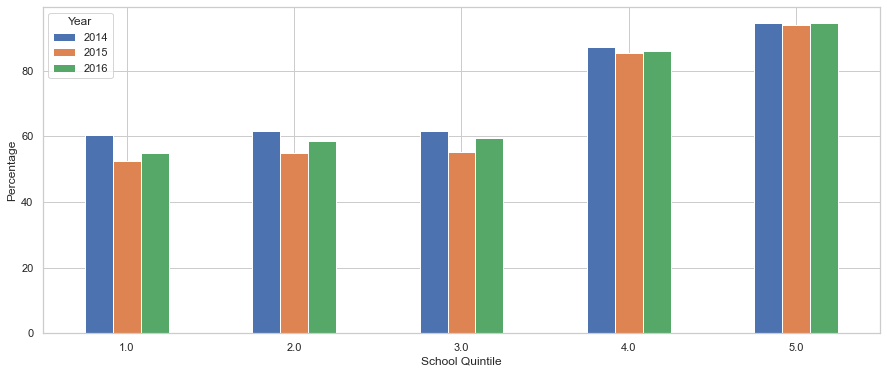

In [700]:
# This method allowed to put the numerical data in numerical order
stu_p.quintile = pd.to_numeric(stu_p.quintile, errors ='coerce')

# group the data by quintile
ax = stu_p.groupby('quintile').mean()

# create the bar plot
ax = ax.plot.bar(rot = 0, figsize=(15,6))

# set axis labels and legends
ax.set_ylabel('Percentage')
ax.set_xlabel('School Quintile')
ax.legend([2014, 2015, 2016], title='Year')

# Top 10 schools in South Africa with the highest pass rates over the years, based on the number of enrolled students

In [701]:
# Declare the empy dataframes
schools_2014 = pd.DataFrame()
schools_2015 = pd.DataFrame()
schools_2016 = pd.DataFrame()

In [702]:
# list containing the specific columns and dataframes
wrote_year = ['wrote_2014','wrote_2015','wrote_2016']
perc_year = ['perc_2014','perc_2015','perc_2016']
school = [schools_2014, schools_2015, schools_2016]

In [703]:
# loop to iterate through each column, selecting and ordering the columns in order of number of students and
# pass rate
for index in range(len(wrote_year)):
        
    # selecting and ordering the columns in order of number of students and pass rate
    school[index] = matrics[['quintile','name',wrote_year[index],perc_year[index]]
                           ].sort_values(by=[perc_year[index],wrote_year[index]
                                            ],ascending=[False,False]).head(10).copy()
        
    # reseting the index so as to assign a common index to each set per year
    school[index] = school[index].reset_index()

# create the data frame
top_schools = pd.DataFrame({'2014':school[0]['name'],
                            'Q_2014':school[0]['quintile'],
                            '2015':school[1]['name'],
                            'Q_2015':school[1]['quintile'],
                            '2016':school[2]['name'],
                            'Q_2016':school[2]['quintile'],
                           })

In [704]:
top_schools

,2014,Q_2014,2015,Q_2015,2016,Q_2016
0,HUDSON PARK HIGH SCHOOL,5.0,CAMBRIDGE HIGH SCHOOL,5.0,PEARSON HIGH SCHOOL,5.0
1,STIRLING HIGH SCHOOL,5.0,FICHARDTPARK SS,5.0,FICHARDTPARK SS,5.0
2,FICHARDTPARK SS,5.0,GREY BOYS SCHOOL,5.0,VICTORIA PARK HIGH SCHOOL,5.0
3,EUNICE SS,5.0,WESTERING HIGH SCHOOL,5.0,CAMBRIDGE HIGH SCHOOL,5.0
4,PEARSON HIGH SCHOOL,5.0,PEARSON HIGH SCHOOL,5.0,GOUDVELD SS,5.0
5,WESTERING HIGH SCHOOL,5.0,EUNICE SS,5.0,WESTERING HIGH SCHOOL,5.0
6,GREY BOYS SCHOOL,5.0,C EN N H MEISIESKOOL ORANJE,5.0,EUNICE SS,5.0
7,ST PATRICKS SENIOR SECONDARY SCHOOL,3.0,HOeRSKOOL NICO MALAN,5.0,SASOLBURG SS,5.0
8,CLARENDON GIRLS HIGH SCHOOL,5.0,SELBORNE COLLEGE BOYS HIGH,2.0,C EN N H MEISIESKOOL ORANJE,5.0
9,C EN N H MEISIESKOOL ORANJE,5.0,CLARENDON GIRLS HIGH SCHOOL,5.0,CLARENDON GIRLS HIGH SCHOOL,5.0


# Does increasing quintile have an increase in student pass rate?

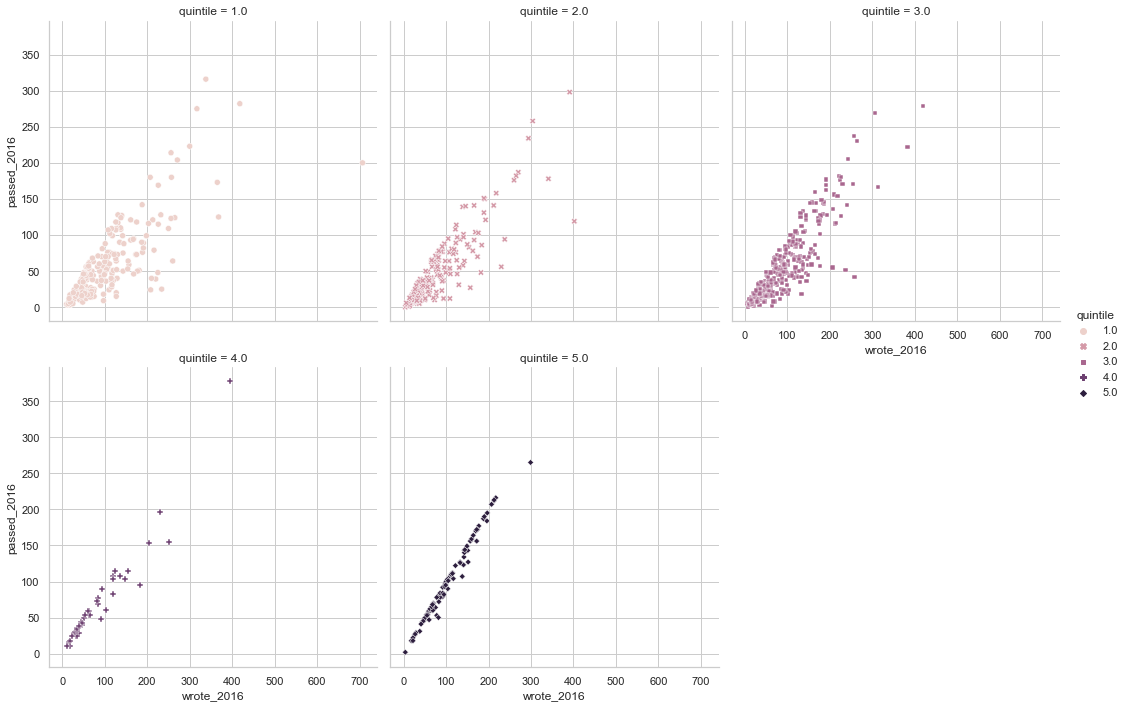

In [705]:
# create relplot of studenst that passed and wrote in 2016 grouped per quintile
sns.relplot(x = "wrote_2016", y="passed_2016", col="quintile",
           hue="quintile", style="quintile", data = matrics, col_wrap=3)

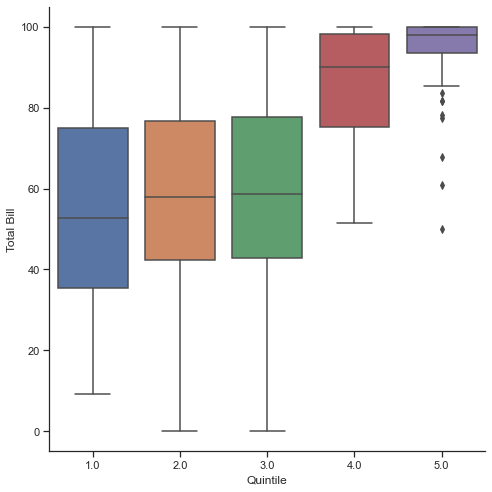

In [706]:
# create box plot
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='quintile', y='perc_2016', data=pass_rates,
                      kind = 'box', height=7)
    g.set_axis_labels('Quintile', 'Total Bill')

# How do quintile 4 and 5 school pass rates compare from 2014 to 2016 with other quintile schools

In [707]:
# Select the appropriate columns
pass_rate = matrics[['quintile','perc_2014', 'perc_2015', 'perc_2016']].copy()

# each double row represents the pass rates per quintile selected by condition
g1 = pass_rate[pass_rate['quintile']==1.0].copy()
g1 = g1[['perc_2014', 'perc_2015', 'perc_2016']]

g2 = pass_rate[pass_rate['quintile']==2.0].copy()
g2 = g2[['perc_2014', 'perc_2015', 'perc_2016']]

g3 = pass_rate[pass_rate['quintile']==3.0]
g3 = g3[['perc_2014', 'perc_2015', 'perc_2016']]

g4 = pass_rate[pass_rate['quintile']==4.0]
g4 = g4[['perc_2014', 'perc_2015', 'perc_2016']]

g5 = pass_rate[pass_rate['quintile']==5.0]
g5 = g5[['perc_2014', 'perc_2015', 'perc_2016']]

Text(0.5, 1.0, 'Quintile Three')

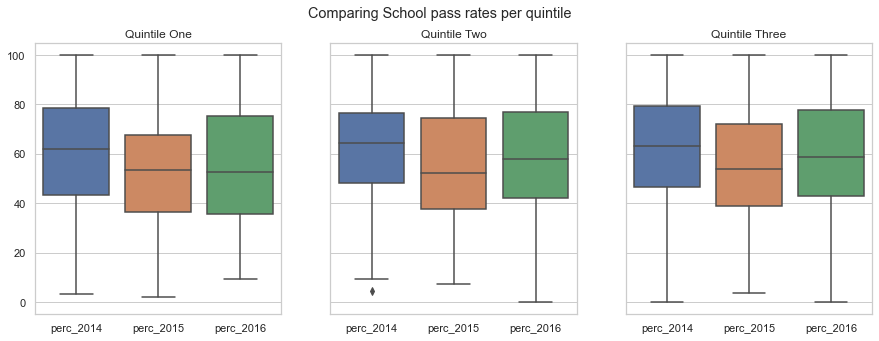

In [708]:
# create the figure, subplots and title
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Comparing School pass rates per quintile')

# create the Quintile one plot and assign to a subplot
sns.boxplot(ax=axes[0], x='variable', y='value', data=pd.melt(g1))
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('Quintile One')

# create the Quintile two plot and assign to a subplot
sns.boxplot(ax=axes[1], x='variable', y='value', data=pd.melt(g2))
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Quintile Two')

# create the Quintile three plot and assign to a subplot
sns.boxplot(ax=axes[2], x='variable', y='value', data=pd.melt(g3))
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_title('Quintile Three')

Text(0.5, 1.0, 'Quintile Five')

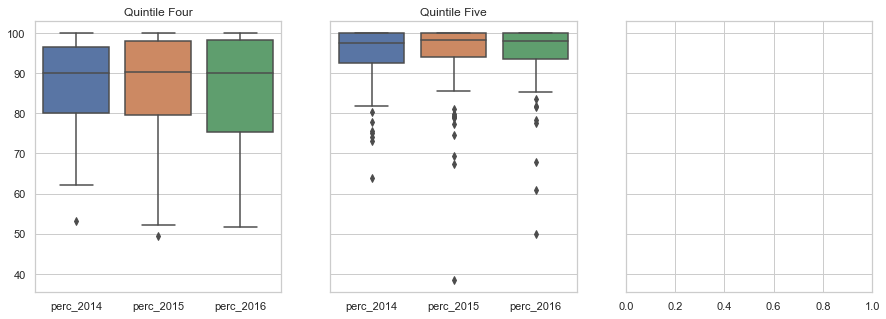

In [709]:
# create sub plots
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)

# create the Quintile four plot and assign to a subplot
sns.boxplot(ax=axes[0], x='variable', y='value', data=pd.melt(g4))
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('Quintile Four')

# create the Quintile five plot and assign to a subplot
sns.boxplot(ax=axes[1], x='variable', y='value', data=pd.melt(g5))
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Quintile Five')


# Whats the total number of students that passed matric over 3 years

In [710]:
# select the appropriate columns
pass_total = matrics[['passed_2014','passed_2015','passed_2016']].copy()

# declare the variables
year_2014, year_2015, year_2016 = 0,0,0
a,b,c,d,e,f = 0,0,0,0,0,0

In [711]:
# list containing the specific columns and dataframes
wrote_year = ['wrote_2014','wrote_2015','wrote_2016']
pass_year = ['passed_2014','passed_2015','passed_2016']
year_total_passed = [year_2014, year_2015, year_2016]
year_total_not = [a, b, c]
year_perc = [d,e,f]

# for loop which calculates for each year
for index in range(3):
    
    # get the number of students that passed per year
    year_total_passed[index] = matrics[pass_year[index]].sum()
    
    # get the total number of studenst that did not pass per year
    year_total_not[index] = (matrics[wrote_year[index]].sum()) - (matrics[pass_year[index]].sum())
    
    # get the total percent that passed per year
    year_perc[index] = round((((matrics[pass_year[index]].sum()) / (matrics[wrote_year[index]].sum()))*100),2)



In [712]:
# Create the dataframe of the data from above
pass_total = pd.DataFrame({'Passed': year_total_passed,
                           'Not': year_total_not,
                            'Perc Passed': year_perc
                          }, index=['2014','2015', '2016'])
pass_total

,Passed,Not,Perc Passed
2014,48309.0,21998.0,68.71
2015,54381.0,34343.0,61.29
2016,53254.0,30371.0,63.68


<AxesSubplot:>

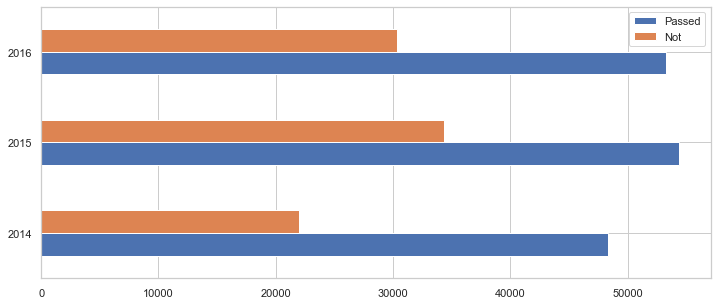

In [713]:
# display the data in a horizontal bar graph
pass_total[['Passed', 'Not']].plot.barh(rot=0, figsize=(12,5))

# What are the portions of the students in each quintile?

In [714]:
students = matrics[['quintile','wrote_2014','wrote_2015','wrote_2016']].copy()

In [715]:
students = students.groupby('quintile').sum()
students = students.rename(index={1.0: 'One', 2.0:'Two', 3.0:'Three', 4.0: 'Four', 5.0:'Five'})
students

,wrote_2014,wrote_2015,wrote_2016
quintile,,,
One,16377.0,22900.0,22380
Two,13004.0,16811.0,15915
Three,28529.0,35396.0,32562
Four,3300.0,4147.0,3767
Five,9097.0,9470.0,9001


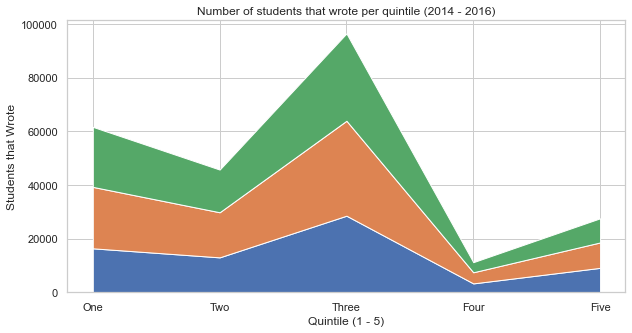

In [716]:
# Groups of students
groupOne = students['wrote_2014']
groupTwo = students['wrote_2015']
groupThree = students['wrote_2016']

# Create the stacked area
y = np.row_stack((groupOne,groupTwo,groupThree))
x = students.index

y1, y2, y3=(groupOne,groupTwo,groupThree)

# create the subplot figure
fig,ax = plt.subplots(figsize=(10,5))
ax.stackplot(x,y)

# format the graph
plt.title("Number of students that wrote per quintile (2014 - 2016)")
plt.xlabel("Quintile (1 - 5)")
plt.ylabel("Students that Wrote")


plt.show()

<AxesSubplot:xlabel='quintile'>

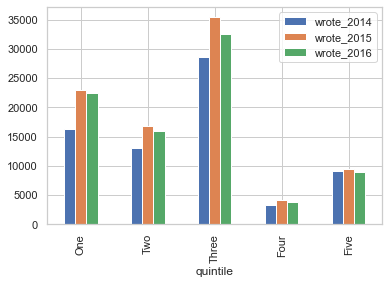

In [717]:
students.plot.bar()

# What are the portions of schools in each quintile?

In [718]:
schools = matrics[['quintile','quintile_cat']].copy()

In [719]:
schools = schools.groupby('quintile').count()
schools = schools.rename(index={1.0: 'One', 2.0:'Two', 3.0:'Three', 4.0: 'Four', 5.0:'Five'})
schools

,quintile_cat
quintile,
One,203
Two,186
Three,370
Four,43
Five,84


# How many schools had a 100% pass rate per quintile

In [720]:
# select the columns by condition
schools = matrics[['quintile', 'perc_2014']]
schools = schools[schools['perc_2014']==100.0]

# get the count
schools_grouped1 = schools.groupby('quintile', as_index=False).count()
schools_grouped1

,quintile,perc_2014
0,1.0,5
1,2.0,1
2,3.0,4
3,4.0,7
4,5.0,24


In [721]:
# select the columns by condition
schools = matrics[['quintile', 'perc_2015']]
schools = schools[schools['perc_2015']==100.0]

# get the count
schools_grouped2 = schools.groupby('quintile', as_index=False).count()
schools_grouped2

,quintile,perc_2015
0,1.0,3
1,2.0,2
2,3.0,5
3,4.0,10
4,5.0,24


In [722]:
# select the columns by condition
schools = matrics[['quintile', 'perc_2016']]
schools = schools[schools['perc_2016']==100.0]

# get the count
schools_grouped3 = schools.groupby('quintile', as_index=False).count()
schools_grouped3

,quintile,perc_2016
0,1.0,1
1,2.0,5
2,3.0,10
3,4.0,10
4,5.0,30


In [723]:
# create the data frame to combine the data I have generated above
schools_set1 = pd.DataFrame({'2014':schools_grouped1['perc_2014'],
                           '2015':schools_grouped2['perc_2015'],
                           '2016':schools_grouped3['perc_2016'],
                           'Quintile':['One','Two','Three','Four','Five']
                           })

In [724]:
# rename the index to quintile cat
schools_set1 = schools_set1.set_index('Quintile')
schools_set1

,2014,2015,2016
Quintile,,,
One,5,3,1
Two,1,2,5
Three,4,5,10
Four,7,10,10
Five,24,24,30


Text(0.5, 1.0, 'Schools with 100% Pass Rate per quintile')

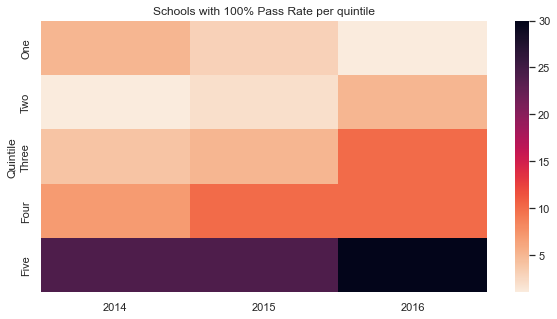

In [725]:
# create the subplot figure
plt.subplots(figsize=(10,5))

# create the plot and add title
sns.heatmap(schools_set1, cmap="rocket_r", linewidths=0)
plt.title('Schools with 100% Pass Rate per quintile')

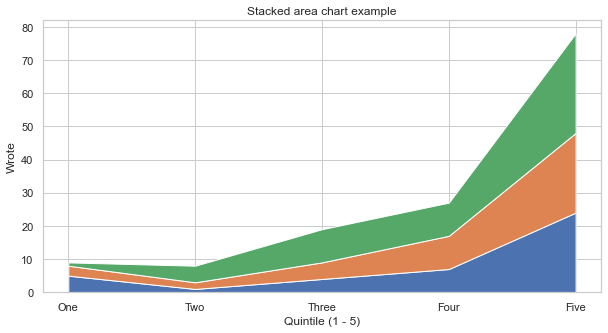

In [726]:
# Set the data for the stacks
groupOne = schools_set1['2014']
groupTwo = schools_set1['2015']
groupThree = schools_set1['2016']

# Create the stacked area
y = np.row_stack((groupOne,groupTwo,groupThree))
x = schools_set1.index

y1, y2, y3=(groupOne,groupTwo,groupThree)

# generate the subplots
fig,ax = plt.subplots(figsize=(10,5))
ax.stackplot(x,y)

# format the labels
plt.title("Stacked area chart example")
plt.xlabel("Quintile (1 - 5)")
plt.ylabel("Wrote")
plt.show()

# How do schools compare for pass rates above 50%

In [727]:
# select the columns and assign to variable
g1 = matrics[['quintile','perc_2014', 'perc_2015', 'perc_2016']].groupby('quintile').quantile(q=0.5)

# rename the column indexes
g1 = g1.rename(index={1.0: 'One', 2.0:'Two', 3.0:'Three', 4.0: 'Four', 5.0:'Five'})
g1

,perc_2014,perc_2015,perc_2016
quintile,,,
One,61.70,53.30,52.70
Two,64.45,52.25,57.85
Three,63.20,54.00,58.65
Four,89.90,90.20,90.10
Five,97.45,98.10,97.95
